## Codio Activity 7.1: Fitting a Simple Regression Line Using Plotly and Scikit-Learn

This activity focuses on using `sklearn` to build a `LinearRegression` estimator.  For the dataset, another built-in Seaborn dataset with information on geyser explosions is used.  Using this dataset, you are to build a regression model using the wait time to predict the duration of the explosion.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### The Geyser Data

The dataset contains information on the waiting time for a geyser explosion, the duration of the explosion, and a categorization of the explosion duration.  This data comes from the Seaborn built-in datasets.

In [2]:
geyser = sns.load_dataset('geyser')
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [3]:
geyser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


## Problem 1

### Declaring `X` and `y`.  

Assign the column `waiting` as a DataFrame to the variable `X` and the column `duration` as a series to the variable `y` below.  

In [4]:
X = geyser[['waiting']]
y = geyser['duration']

## Problem 2

### Building a model with `LinearRegression` 

Below, instatiate a linear regression model using the `LinearRegression()` function. The chain the `fit()` function and with the arguments `X` and `y` from above.  Make sure to use only the default settings.  Assign your regressor to the variable `linreg` below.  

In [5]:
linreg = LinearRegression().fit(X,y)
linreg

LinearRegression()

## Problem 3

### Adding a prediction column

Add a column, `prediction`, to the `geyser` DataFrame. To this column assign `linreg.predict(X)`.

MAke sure to check that your DataFrame geyser contains the new column. 


In [6]:
geyser['prediction'] = linreg.predict(X)
geyser.head()

,duration,waiting,kind,prediction
0,3.600,79,long,4.100592
1,1.800,54,short,2.209893
2,3.333,74,long,3.722452
3,2.283,62,short,2.814917
4,4.533,85,long,4.554360


## Problem 4

### Equation of line

The equation of the line will be of the form

$$\text{duration} = \text{waiting}\times \text{slope} + \text{intercept}$$

Use the `coef_` attribute on `linreg` to assign the slope of the solution as a float correct to two decimal places to the variable `slope`.

Use the `intercept_` attribute on `linreg` to assign the intercept of the solution as a float correct to two decimal places to the variable `intercept`.

In [8]:
slope = round(float(linreg.coef_),2)
slope

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1596/2687618228.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = round(float(linreg.coef_),2)


0.08

In [9]:
intercept = round(float(linreg.intercept_),2)
intercept

-1.87

## Codio Activity 7.2: Defining, Computing, and Optimizing Loss

This activity focuses on computing and minimizing the L2 loss for different values of theta and identifying the theta that minimizes the L2 loss.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### The Dataset

The geyser data from seaborn is loaded below.  You are to  build a model using the waiting time to predict the geyser explosion duration.

Note that this this model will not have an intercept term.  

In [11]:
geyser.head()

,duration,waiting,kind,prediction
0,3.600,79,long,4.100592
1,1.800,54,short,2.209893
2,3.333,74,long,3.722452
3,2.283,62,short,2.814917
4,4.533,85,long,4.554360


## Problem 1

### Creating an array of $\theta$'s

Below, create an array of 100 equally spaced values between -1 and 1.  Use the `np.linspace` method demonstrated in the lectures and assign your answer as a numpy array to `thetas` below.

In [12]:
thetas = np.linspace(-1,1,100)
thetas

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

## Problem 2

### The Model

In this assignment, our model takes the form:

$$\text{duration} = \text{waiting} \times \theta$$

Multiply the values in the `waiting` column of the `geyser` dataset by `0.8` to create a prediction for the case of $\theta = 0.8$. Assign them as a Series to the variable `prediction` below.

In [14]:
prediction = 0.8 * geyser['waiting']
prediction

0      63.2
1      43.2
2      59.2
3      49.6
4      68.0
       ... 
267    64.8
268    36.8
269    72.0
270    36.8
271    59.2
Name: waiting, Length: 272, dtype: float64

## Problem 3

### Determining Mean Squared Error

Use the `mean_squared_error` function to calculate the MSE between the `duration` column of the `geyser` DataFrame and the `0.8*geyser['waiting']` data.

Use the function `float` to convert your result to floats. 

Assign your result as a float to `mse` below.

In [16]:
mse = float(mean_squared_error(geyser['duration'],0.8*geyser['waiting']))
mse

2930.2861285845593

## Problem 4

### Computing the Mean Squared Error for `thetas`

Use a `for` loop over `thetas` to compute the MSE between the column `geyser['duration']` and the column `geyser['waiting']`multiplied by each value of `theta`.  Assign these values in order to the list `mses` below.

In [25]:
mses = []
for i in thetas:
    mse = float(mean_squared_error(geyser['duration'], i*geyser['waiting']))
    mses.append(mse)
print(mses)

[5746.399297702205, 5527.445557830223, 5312.744883371734, 5102.29727432674, 4896.102730695238, 4694.161252477228, 4496.472839672713, 4303.037492281691, 4113.855210304161, 3928.925993740124, 3748.2498425895824, 3571.8267568525325, 3399.6567365289766, 3231.7397816189127, 3068.0758921223423, 2908.6650680392668, 2753.507309369682, 2602.6026161135924, 2455.9509882709954, 2313.552425841892, 2175.40692882628, 2041.5144972241628, 1911.8751310355394, 1786.4888302604077, 1665.3555948987703, 1548.4754249506257, 1435.8483204159743, 1327.474281294816, 1223.353307587151, 1123.48539929298, 1027.8705564123015, 936.5087789451162, 849.4000668914241, 766.5444202512253, 687.9418390245196, 613.5923232113072, 543.4958728115885, 477.65248782536247, 416.0621682526297, 358.7249140933903, 305.64072534764404, 256.80960201539096, 212.23154409663135, 171.90655159136477, 135.8346244995914, 104.01576282131126, 76.44996655652436, 53.13723570523066, 34.0775702674303, 19.27097024312305, 8.717435632309025, 2.41696643498

## Problem 5

### Which $\theta$ minimizes Mean Squared Error

Using the list of `mses`, determine the value for $\theta$ that minimized the mean squared error.  You may want to ammend your loop above to check for the smallest value as the loop proceeds.  Assign your answer as a float to `theta_min` below.

In [22]:
mse_min = -1
theta_min = 0

for i in thetas:
    mse = float(mean_squared_error(geyser['duration'], i*geyser['waiting']))
    if mse_min <0:
        mse_min = mse
    elif mse_min > mse:
        mse_min = min(mse_min,mse)
        theta_min = i
print(mse_min,theta_min)

0.3695626511606713 0.05050505050505061


Note that again the shape of the Mean Squared Error is a parabola.  The plot below shows the values of thetas againt their mean squared error.  

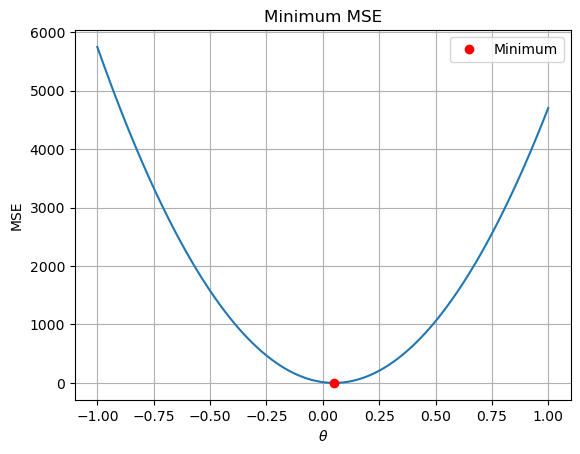

In [32]:
plt.plot(thetas, mses)
plt.plot(thetas[np.argmin(mses)], min(mses), 'ro', label = 'Minimum')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid()
# plt.savefig('images/mse_min.png')

## Codio Activity 7.3: Using SciPy Optimize To Optimize L2 Loss

This assignment focuses on using `scipy.optimize` to minimize the mean squared error for a linear model.  For this example,  a synthetic dataset is created using `sklearn`.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Creating Data

To create the dataset, a linear function with known slope is created, and gaussian noise is added to each point at random.  This allows comparison to the results and helps to see if the minimum solution is reasonable. 

$$y = 4.2x + \sigma$$

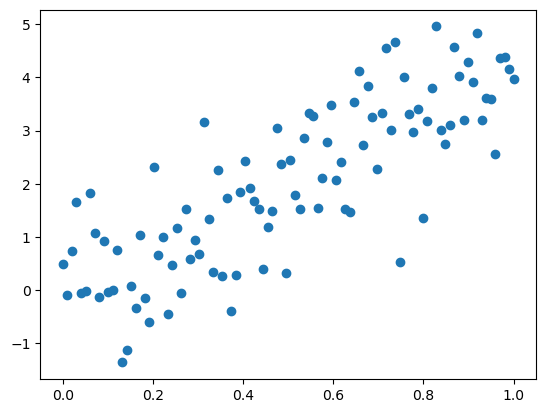

In [4]:
np.random.seed(42)
x = np.linspace(0,1,100)
y = 4.2*x + np.random.normal(size = 100)
plt.scatter(x,y)

## Problem 1

### Array of $\theta$'s

Below, create an array of possible $\theta$ values using `np.linspace`.  Create 100 values starting at 3 and ending at 5.  Assign your solution as an array to `thetas` below.

In [5]:
thetas = np.linspace(3,5,100)
thetas

array([3.        , 3.02020202, 3.04040404, 3.06060606, 3.08080808,
       3.1010101 , 3.12121212, 3.14141414, 3.16161616, 3.18181818,
       3.2020202 , 3.22222222, 3.24242424, 3.26262626, 3.28282828,
       3.3030303 , 3.32323232, 3.34343434, 3.36363636, 3.38383838,
       3.4040404 , 3.42424242, 3.44444444, 3.46464646, 3.48484848,
       3.50505051, 3.52525253, 3.54545455, 3.56565657, 3.58585859,
       3.60606061, 3.62626263, 3.64646465, 3.66666667, 3.68686869,
       3.70707071, 3.72727273, 3.74747475, 3.76767677, 3.78787879,
       3.80808081, 3.82828283, 3.84848485, 3.86868687, 3.88888889,
       3.90909091, 3.92929293, 3.94949495, 3.96969697, 3.98989899,
       4.01010101, 4.03030303, 4.05050505, 4.07070707, 4.09090909,
       4.11111111, 4.13131313, 4.15151515, 4.17171717, 4.19191919,
       4.21212121, 4.23232323, 4.25252525, 4.27272727, 4.29292929,
       4.31313131, 4.33333333, 4.35353535, 4.37373737, 4.39393939,
       4.41414141, 4.43434343, 4.45454545, 4.47474747, 4.49494

## Problem 2

### Loss Function

Now, complete the function `l2_loss` below that accepts a single `theta` value as input and calculates the mean squared error based on the true y-values and the given theta.

The function should return a single float value representing the mean squared error.

In [6]:
def l2_loss(theta):
  """
  This function accepts a single theta value
  and calculates the mean squared error based
  on (theta*x - y)^2

  Arguments
  ---------
  theta: float
    The value to use for the parameter of the
    regression model.

  Returns
  -------
  mse: float
    Mean Squared Error
  """

In [7]:
def l2_loss(theta):
    mse = np.mean((theta*x - y)**2)
    return mse
l2_loss(8)

np.float64(5.970444002663118)

## Problem 3

### Using `scipy` to minimize `l2_loss`

Use the `minimize` function that has been imported from `scipy.optimize` to find the minimum value of `l2_loss` using `x0 = 4`.  Assign your results to the `minimum_theta` variable below.  

Next, use the `minimum_theta.x` attribute to examine the solution and assign as a numpy array to `theta_solution` below.

In [10]:
minimum_theta = minimize(l2_loss, x0 = 4)
theta_solution = minimum_theta.x
print(minimun_theta)
theta_solution

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8224833379603176
        x: [ 4.080e+00]
      nit: 2
      jac: [-2.235e-08]
 hess_inv: [[ 1.492e+00]]
     nfev: 6
     njev: 3


array([4.08001601])

Now that you have found the minimum value, you can uncomment the code below and visualize the mean squared error along with the minimum value based on `scipy`.  

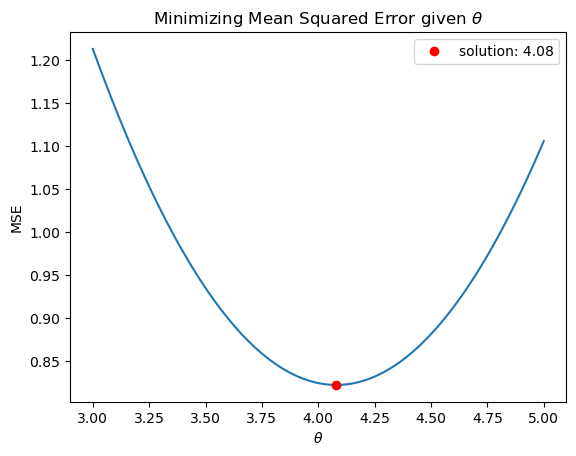

In [11]:
plt.plot(thetas, [l2_loss(i) for i in thetas])
plt.plot(theta_solution, l2_loss(theta_solution), 'ro', label = f'solution: {np.round(theta_solution[0], 3)}')
plt.legend();
plt.title(r'Minimizing Mean Squared Error given $\theta$');
plt.xlabel(r'$\theta$')
plt.ylabel('MSE');

## Codio Activity 7.4: Mean Absolute Loss (MAE)

This assignment focuses on minimizing the mean absolute value loss function defined as:

$${\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}}$$

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

Using the same dataset as with our `l2_loss` function, you are to compute the value for $\theta$ that minimizes the MAE.  

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import minimize

### The Dataset

Again, a synthetic dataset is created as

$$y = 4.2x + \sigma$$

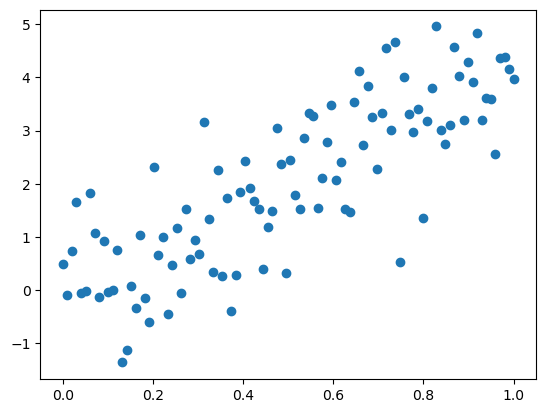

In [14]:
np.random.seed(42)
x = np.linspace(0,1,100)
y = 4.2*x + np.random.normal(size =100)
plt.scatter(x,y)

## Problem 1

### A MAE loss function

Complete the `mae` function below that takes in a value for $\theta$.

Your functio should compute and and return the mean absolute error based on the model $y = \theta*x$.  

In [15]:
def mae_loss(theta):
    """
    This function accepts an array of thetas
    and returns the mean absolute error based
    on np.mean(|(theta*xi - yi)|)
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
            
    Returns
    -------
    mse: np.float
         Mean Absolute Error
    """

In [16]:
def mae_loss(theta):
    return np.mean(np.abs(theta*x - y))

In [17]:
mae = mae_loss(8)
mae

np.float64(2.12145907129924)

## Problem 2

### Minimizing the MAE Loss

Use the `minimize` function imported from `scipy.optimize` to determine the value for `mae_loss` that minimizes the Mean Absolute Error loss function starting at `x0 = 4`.  Assign this result to `minimum_theta `.

Next, use the `minimum_theta.x[0]` attribute to assign the solution as a float to `theta_mae` below.

In [20]:
minimum_theta = minimize(mae_loss,x0 = 4)
minimum_theta
theta_mae = minimum_theta.x[0]
theta_mae

np.float64(4.094949416816235)

## Problem 3

### Uncovering the true $\theta$

Assuming that the true relationship between $x$ and $y$ was determined by a model with $\theta = 4.2$, which loss function better approximated the true value for $\theta$ here?  Enter your answer as a string -- either 'mse' or 'mae' -- below to the variable `better_loss`.

In [21]:
better_loss = 'mae'

## Codio Activity 7.5: Calculating Multiple Loss Functions

A third loss function mentioned is the Huber loss function.  This is notable for its resistance to extreme values and is defined as a piecewise function:

$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

In this activity, you will compute and compare the results of minimizing the mean squared error, mean absolute error, and huber loss functions.  

NOTE: If the formula is not rendering correctly (overlapping text), double-click in this cell and then Shift-Enter to reload the cell.


## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

### The tips data

For this exercise, the tips dataset from the lectures will be used, and you are to predict the tip amount given the total bill.  

In [24]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
X = tips['total_bill']
y = tips['tip']

## Problem 1

### Create a Huber Loss function

Using the formula repeated below for the Huber loss, complete the function that returns the sum of the Huber Loss equation.

$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$


The `huber_loss` function should take as input, two arguments: 
        - `theta`: a float value to use for parameter of regression model.
        - `delta`: the delta value in the Huber loss. Set this parameter equal to `1.5`.
        
Inside the function, define `y_pred` as the product of `theta` and `X`. Next, define `y_err` and the absolute value of the difference between `y` and `y_pred`.

Use the code below to return the value of the error from the Huber loss formula:

```
sum(np.where(y_err <= delta, 1/2*(y_err)**2, delta*(y_err - 1/2*delta)))
```


In [26]:
def huber_loss(theta, delta):
    """
    This function accepts a value for theta
    and returns the sum of the huber loss.
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
           
    delta: float
           Value for delta in Huber Loss
            
    Returns
    -------
    huber: np.float
         Sum of huber loss
    """

In [28]:
def huber_loss(theta, delta=1.5):
    y_pred = theta*X
    y_err = np.abs(y - y_pred)
    return sum(np.where(y_err <= delta, 1/2*(y_err)**2, delta*(y_err - 1/2*delta)))
huber_loss(8)

np.float64(56561.369999999995)

## Problem 2

### Minimizing Huber Loss

Use the `minimize` function imported from `scipy.optimize` to determine the optimal value of `huber_loss` with with `x0 = .5`. Assign your result to `minimum_theta`.

Next, use the the attribute `minimum_theta.x[0]` together with `np.float` calculate the value of `theta_huber` below   


In [30]:
minimum_theta = minimize(huber_loss,x0 = 0.5)
theta_huber = float(minimum_theta.x[0])
theta_huber

0.14626752601211537